In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

观察数据

In [79]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


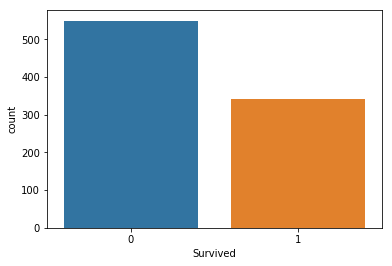

In [5]:
sns.countplot(data['Survived'])


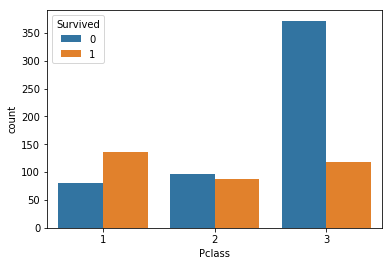

In [7]:
sns.countplot(data['Pclass'],hue=data['Survived'])

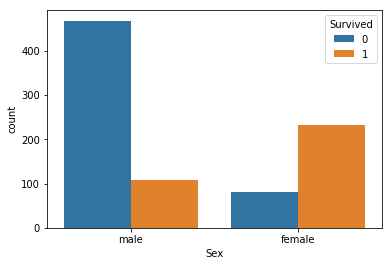

In [8]:
sns.countplot(data['Sex'],hue=data['Survived'])

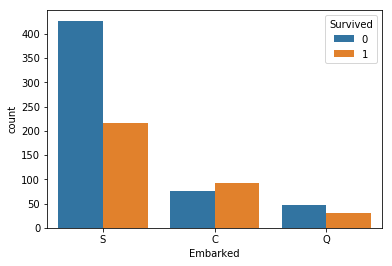

In [11]:
sns.countplot(data['Embarked'],hue=data['Survived'])

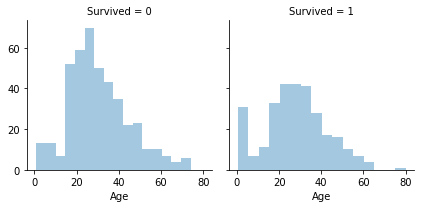

In [18]:
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,'Age',kde=False)

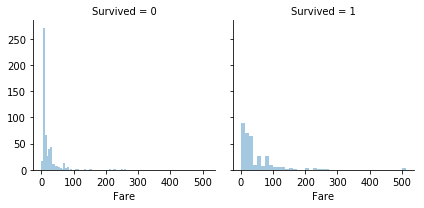

In [20]:
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,'Fare',kde=False)

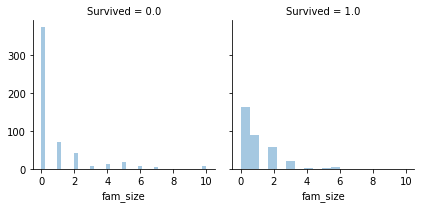

In [88]:
data['fam_size']=data['Parch']+data['SibSp']
test['fam_size']=test['Parch']+test['SibSp']
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,'fam_size',kde=False)

处理数据

In [80]:
data=data.append(test)
data.reset_index(inplace=True,drop=True)
id=data['PassengerId']
data.drop(labels=['PassengerId'],axis=1,inplace=True)
data.insert(0,'PassengerId',id)
data.head()

,PassengerId,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
1,2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
2,3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
3,4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
4,5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [81]:
data['Embarked']=data['Embarked'].fillna('S')
data['Fare']=data['Fare'].fillna(data['Fare'].mean())

In [82]:
data['Cabin']=data['Cabin'].apply(lambda x:str(x)[0] if not pd.isnull(x) else 'Nocabin')
data['title']=data['Name'].str.split(', ',expand=True)[1]
data['title']=data['title'].str.split('.',expand=True)[0]

In [83]:
data['title1']=data['title'].replace(['Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'],['Mr','Mr','Mr','Miss','Miss','Mr','Mrs','Mr','Miss','Mr','Mr','Mrs','Mr','Mrs'])
data['title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [84]:
data.drop(['Ticket'],axis=1,inplace=True)

In [85]:
data['Sex']=data['Sex'].astype('category').cat.codes
data['Embarked']=data['Embarked'].astype('category').cat.codes
data['Pclass']=data['Pclass'].astype('category').cat.codes
data['Cabin']=data['Cabin'].astype('category').cat.codes
data['Sex']=data['Sex'].astype('category').cat.codes
data['title1']=data['title1'].astype('category').cat.codes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
PassengerId    1309 non-null int64
Age            1046 non-null float64
Cabin          1309 non-null int8
Embarked       1309 non-null int8
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
Pclass         1309 non-null int8
Sex            1309 non-null int8
SibSp          1309 non-null int64
Survived       891 non-null float64
title          1309 non-null object
title1         1309 non-null int8
dtypes: float64(3), int64(3), int8(5), object(2)
memory usage: 88.3+ KB


In [12]:
from sklearn.ensemble import RandomForestRegressor as RFR
rfr=RFR(n_estimators=2000,random_state=17)

In [89]:
agenull=data[data['Age'].isnull()]
agenotnull=data[data['Age'].notnull()]
agenotnull.info()
outer=agenotnull

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1306
Data columns (total 14 columns):
PassengerId    1046 non-null int64
Age            1046 non-null float64
Cabin          1046 non-null int8
Embarked       1046 non-null int8
Fare           1046 non-null float64
Name           1046 non-null object
Parch          1046 non-null int64
Pclass         1046 non-null int8
Sex            1046 non-null int8
SibSp          1046 non-null int64
Survived       714 non-null float64
title          1046 non-null object
title1         1046 non-null int8
fam_size       1046 non-null int64
dtypes: float64(3), int64(4), int8(5), object(2)
memory usage: 86.8+ KB


,PassengerId,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,title,title1,fam_size
1294,1295,17.0,7,2,47.1000,"Carrau, Mr. Jose Pedro",0,0,1,0,NaN,Mr,2,0
1295,1296,43.0,3,0,27.7208,"Frauenthal, Mr. Isaac Gerald",0,0,1,1,NaN,Mr,2,1
1296,1297,20.0,3,0,13.8625,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",0,1,1,0,NaN,Mr,2,0
1297,1298,23.0,7,2,10.5000,"Ware, Mr. William Jeffery",0,1,1,1,NaN,Mr,2,1
1298,1299,50.0,2,0,211.5000,"Widener, Mr. George Dunton",1,0,1,1,NaN,Mr,2,2
1299,1300,NaN,7,1,7.7208,"Riordan, Miss. Johanna Hannah""""",0,2,0,0,NaN,Miss,1,0
1300,1301,3.0,7,2,13.7750,"Peacock, Miss. Treasteall",1,2,0,1,NaN,Miss,1,2
1301,1302,NaN,7,1,7.7500,"Naughton, Miss. Hannah",0,2,0,0,NaN,Miss,1,0
1302,1303,37.0,2,1,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,0,0,1,NaN,Mrs,3,1
1303,1304,28.0,7,2,7.7750,"Henriksson, Miss. Jenny Lovisa",0,2,0,0,NaN,Miss,1,0


In [90]:
agecol=['Embarked','Fare','Pclass','Sex','Cabin','fam_size','title1']
agetrain=np.array(agenotnull[agecol])
agelabel=np.array(agenotnull['Age'])
rfr.fit(agetrain,agelabel)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
           oob_score=False, random_state=17, verbose=0, warm_start=False)

In [91]:
testage=np.array(agenull[agecol])
result=rfr.predict(testage)
result[:5]

array([28.85099649, 32.88814115, 39.170344  , 27.36593964, 21.47049748])

In [95]:
agenull.loc[:,'Age']=result
agenull[:5]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,PassengerId,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,title,title1,fam_size
5,6,28.850996,7,1,8.4583,"Moran, Mr. James",0,2,1,0,0.0,Mr,2,0
17,18,32.888141,7,2,13.0000,"Williams, Mr. Charles Eugene",0,1,1,0,1.0,Mr,2,0
19,20,39.170344,7,0,7.2250,"Masselmani, Mrs. Fatima",0,2,0,0,1.0,Mrs,3,0
26,27,27.365940,7,0,7.2250,"Emir, Mr. Farred Chehab",0,2,1,0,0.0,Mr,2,0
28,29,21.470497,7,1,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,2,0,0,1.0,Miss,1,0


In [96]:
temp=agenotnull.append(agenull)
temp.reset_index(inplace=True,drop=True)

temp.tail()

,PassengerId,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,title,title1,fam_size
1304,1300,20.560339,7,1,7.7208,"Riordan, Miss. Johanna Hannah""""",0,2,0,0,NaN,Miss,1,0
1305,1302,26.159028,7,1,7.7500,"Naughton, Miss. Hannah",0,2,0,0,NaN,Miss,1,0
1306,1305,29.975415,7,2,8.0500,"Spector, Mr. Woolf",0,2,1,0,NaN,Mr,2,0
1307,1308,29.975415,7,2,8.0500,"Ware, Mr. Frederick",0,2,1,0,NaN,Mr,2,0
1308,1309,5.090447,7,0,22.3583,"Peter, Master. Michael J",1,2,1,1,NaN,Master,0,2


In [97]:
temp.sort_values(['PassengerId'],inplace=True)

In [98]:
temp.tail(10)

,PassengerId,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,title,title1,fam_size
1304,1300,20.560339,7,1,7.7208,"Riordan, Miss. Johanna Hannah""""",0,2,0,0,NaN,Miss,1,0
1041,1301,3.000000,7,2,13.7750,"Peacock, Miss. Treasteall",1,2,0,1,NaN,Miss,1,2
1305,1302,26.159028,7,1,7.7500,"Naughton, Miss. Hannah",0,2,0,0,NaN,Miss,1,0
1042,1303,37.000000,2,1,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,0,0,1,NaN,Mrs,3,1
1043,1304,28.000000,7,2,7.7750,"Henriksson, Miss. Jenny Lovisa",0,2,0,0,NaN,Miss,1,0
1306,1305,29.975415,7,2,8.0500,"Spector, Mr. Woolf",0,2,1,0,NaN,Mr,2,0
1044,1306,39.000000,2,0,108.9000,"Oliva y Ocana, Dona. Fermina",0,0,0,0,NaN,Dona,3,0
1045,1307,38.500000,7,2,7.2500,"Saether, Mr. Simon Sivertsen",0,2,1,0,NaN,Mr,2,0
1307,1308,29.975415,7,2,8.0500,"Ware, Mr. Frederick",0,2,1,0,NaN,Mr,2,0
1308,1309,5.090447,7,0,22.3583,"Peter, Master. Michael J",1,2,1,1,NaN,Master,0,2


In [125]:
data=temp
col=['Age','Cabin','Embarked','Fare','Parch','Sex','title1','fam_size','Pclass']

In [126]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
rfc=RFC(criterion='gini',n_estimators=1000,
                            min_samples_split=12,min_samples_leaf=1,
                           oob_score=True, random_state=1,n_jobs=-1) 

In [127]:
train=data[data['Survived'].notnull()]
test=data[data['Survived'].isnull()]

In [128]:

rfc.fit(np.array(train[col]),np.array(train['Survived']))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [129]:
res=rfc.predict(np.array(test[col]))
print(res[:20])

[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1.]


In [130]:
submit = pd.read_csv('gender_submission.csv')
old=pd.read_csv('submit.csv')
true=np.array(submit['Survived'])
oldt=np.array(old['Survived'])
error=0
for i in range(true.shape[0]):
    if true[i]!=res[i]:
        error+=1
print(error/true.shape[0])

0.11004784688995216


In [131]:
submit['Survived']=res.astype(int)
submit.to_csv('submit.csv', index= False)